# 01 - Exploratory Data Analysis (EDA)

 EDA stands for Exploratory Data Analysis which is :
- The process of **examining and visulaizing** raw data to understand it patterns
- Detect **outliers, and identify relationships between figures**.

### What we do : 

- Load dataset and check structure, missing values, and data types.
- Visualize numeric features (like age, cholesterol, blood pressure) using histogram and boxplots.
- Visualize categorical features like (chest pain type, gender).
- Generate a correlation heatmap to see which variables most influence heart disease.

In [1]:
# Standard imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


## 2. Loading the Dataset

In [2]:
# Loading Dataset

df = pd.read_csv (r"/Users/emmanueltemitope/Documents/heart.csv.xls")

In [3]:
# Preview Dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of Dataset
df.shape

(1025, 14)

## 3. Data Cleaning

In [5]:
# Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking for nunvalues

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Checking for Duplicates 

df.duplicated().sum()

np.int64(723)

### The Function below does the following to our data
 - Clean the data columns
 - Drop duplicates
 - Replace missing values
 - Display the new shape of the Data after dropping duplicates
 - Display the head of the cleaned Data (first 5 rows)

In [8]:
# Basic cleaning function (lowercase cols, strip whitespace, replace empty strings)
def basic_clean(df):
    df = df.copy()
    df.columns = [str(c).strip().lower().replace(' ', '_') for c in df.columns]
    df = df.drop_duplicates()
    df = df.replace(r'^\s*$', np.nan, regex=True)
    return df

df = basic_clean(df)
print('After basic cleaning shape:', df.shape)
display(df.head())


After basic cleaning shape: (302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 4. Class Distribution (Target)

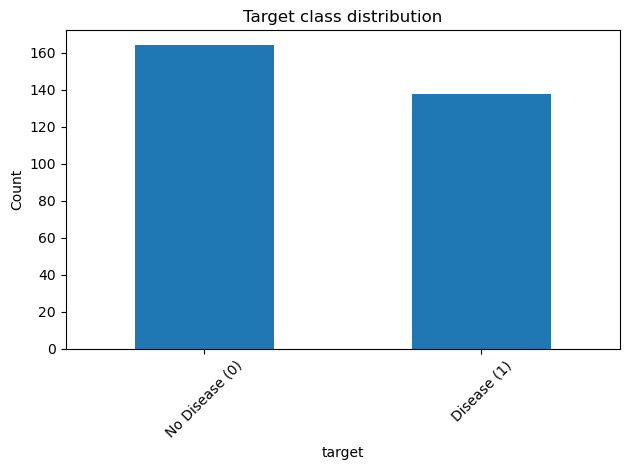

In [10]:
ax = df['target'].value_counts().plot(kind='bar')
ax.set_xticklabels(['No Disease (0)','Disease (1)'])
plt.xticks(rotation =45)
ax.set_ylabel('Count')
ax.set_title('Target class distribution')
plt.tight_layout()
plt.show()


## 5. Feature Encoding

In [11]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()


In [12]:
cat_cols

[]

In [13]:
num_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## 6. Univariate Analysis

- Plot distributions for numeric columns and identify it skewness:

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


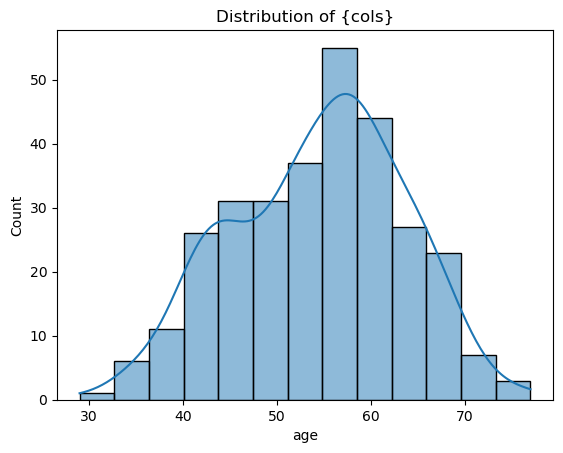

age , — Skewness: -0.20, - Kurtosis : -0.527512


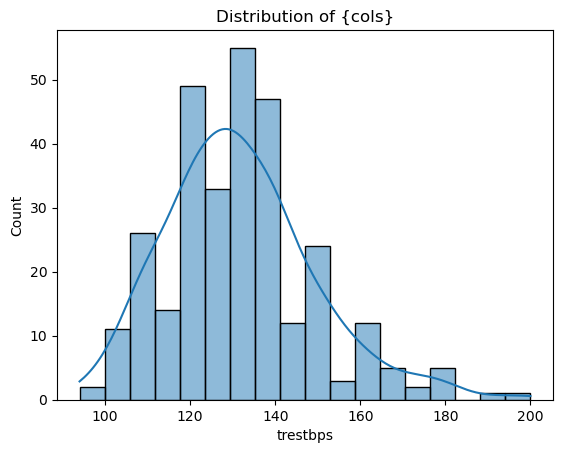

trestbps , — Skewness: 0.72, - Kurtosis :  0.922996


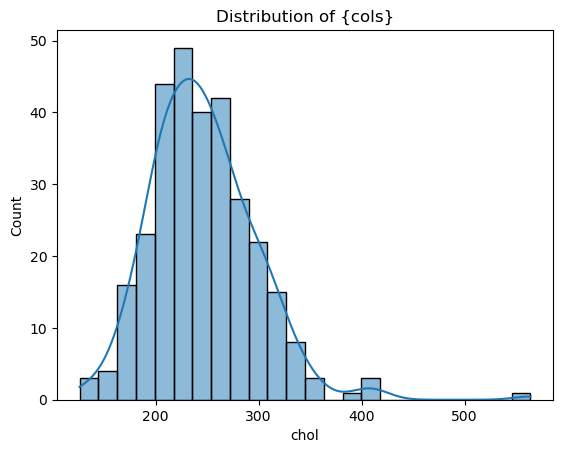

chol , — Skewness: 1.15, - Kurtosis :  4.542591


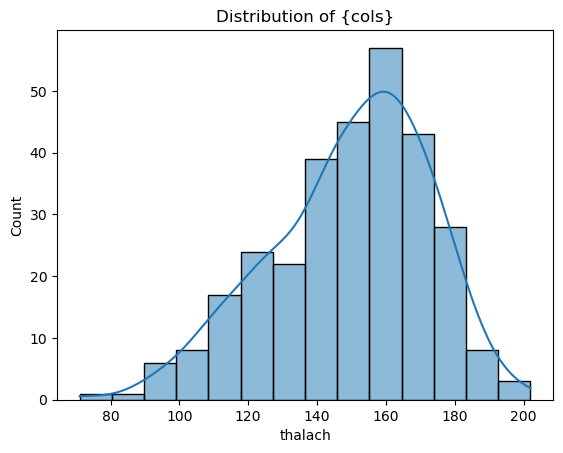

thalach , — Skewness: -0.53, - Kurtosis : -0.062186


In [15]:
# Numerical cols
num_cols = ["age", "trestbps", "chol", "thalach"]
for col in num_cols:
    sns.histplot(df[col], kde = True)
    plt.title ("Distribution of {cols}")
    plt.show()

    skew = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col} , — Skewness: {skew:.2f}, - Kurtosis : {kurtosis : 2f}")


### Insight

- The Distribution cols of the **Age column has a negative skewness of (-0.20)** and **Negative Kurtosis 0f (-0.527)**
- The Distribution cols of the **Trestbps column has a positive skewness of (0.72)** and **Negative Kurtosis 0f (- 0.922)**
- The Distribution cols of the **Chols column has a positive skewness of (1.15)** and **Positive Kurtosis 0f (4.542)**
- The Distribution cols of the **Thalach column has a Negative skewness of (-0.53)** and **Negative Kurtosis 0f (- 0.062)**

## Analyze the Categorical features:

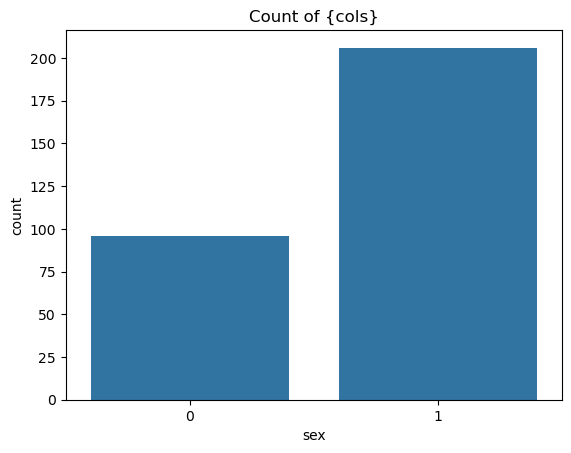

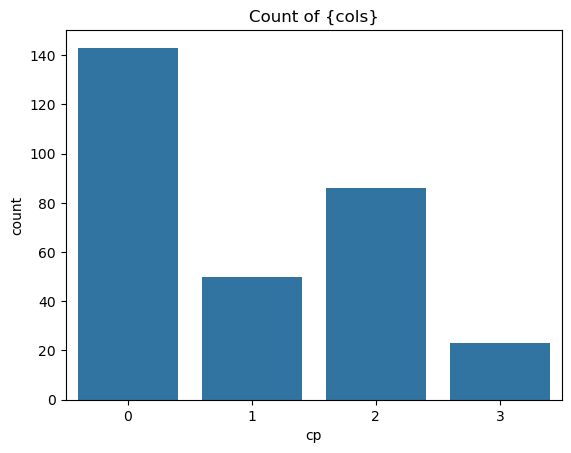

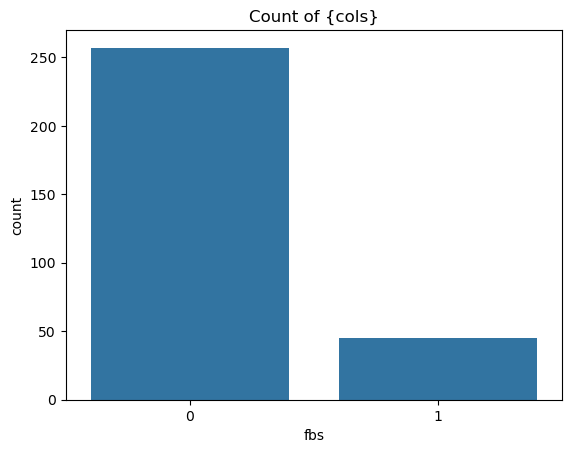

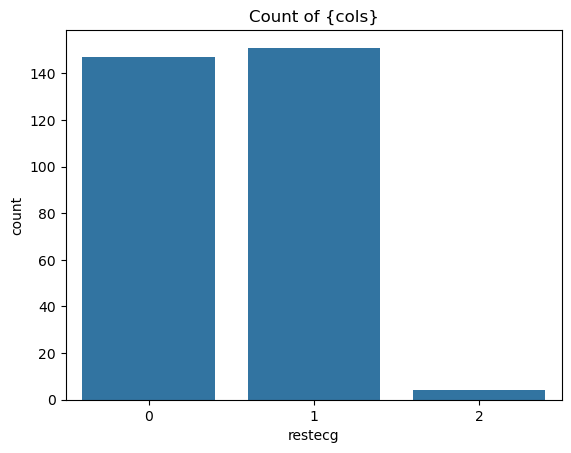

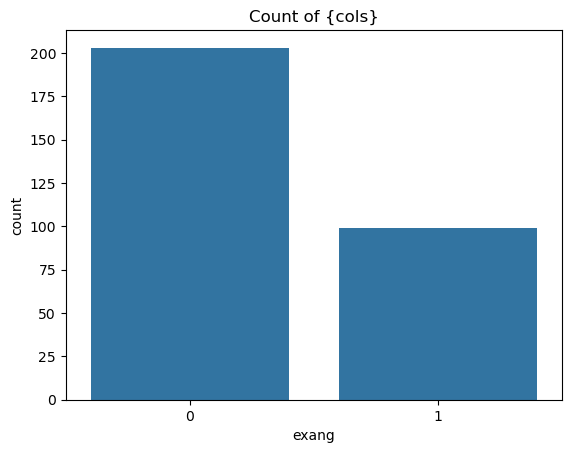

In [16]:
#Categorical columns

cat_cols = ["sex", "cp", "fbs", "restecg", "exang"]
for col in cat_cols:
    sns.countplot(x = col, data = df)
    plt.title("Count of {cols}")
    plt.show()

## 7. Bivariate Analysis

- Compute features against the target

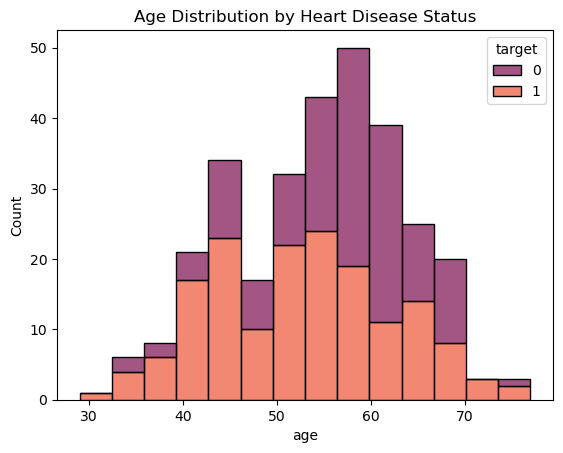

In [17]:
# comparing the Target and Age
sns.histplot(data=df, x='age', hue='target', multiple='stack', bins=14, palette=  "rocket")
plt.title ("Age Distribution by Heart Disease Status")
plt.show()

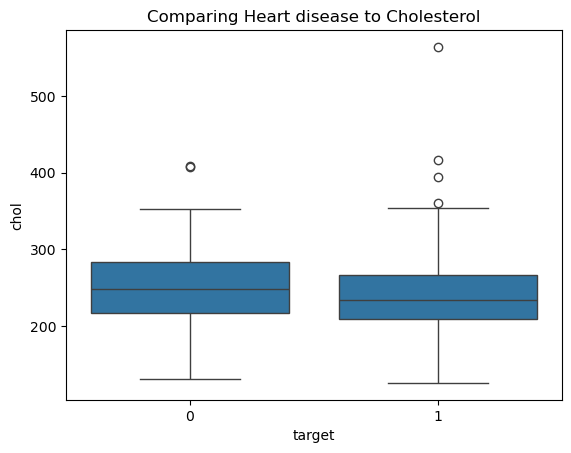

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [18]:
# Comparing the Target and Cholesterol
sns.boxplot (data = df , x = "target", y = "chol")
plt.title ("Comparing Heart disease to Cholesterol")

plt.show()

df["chol"].describe()

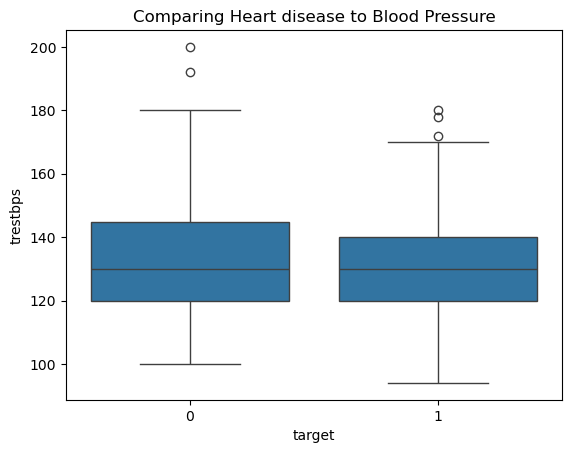

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [19]:
# Comparing the Target and bloodpresssure
sns.boxplot (data = df , x = "target", y = "trestbps")
plt.title ("Comparing Heart disease to Blood Pressure")

plt.show()

df["trestbps"].describe()

## 8. Correlation Analysis

- Meaures the strength and direction of a linear relationship

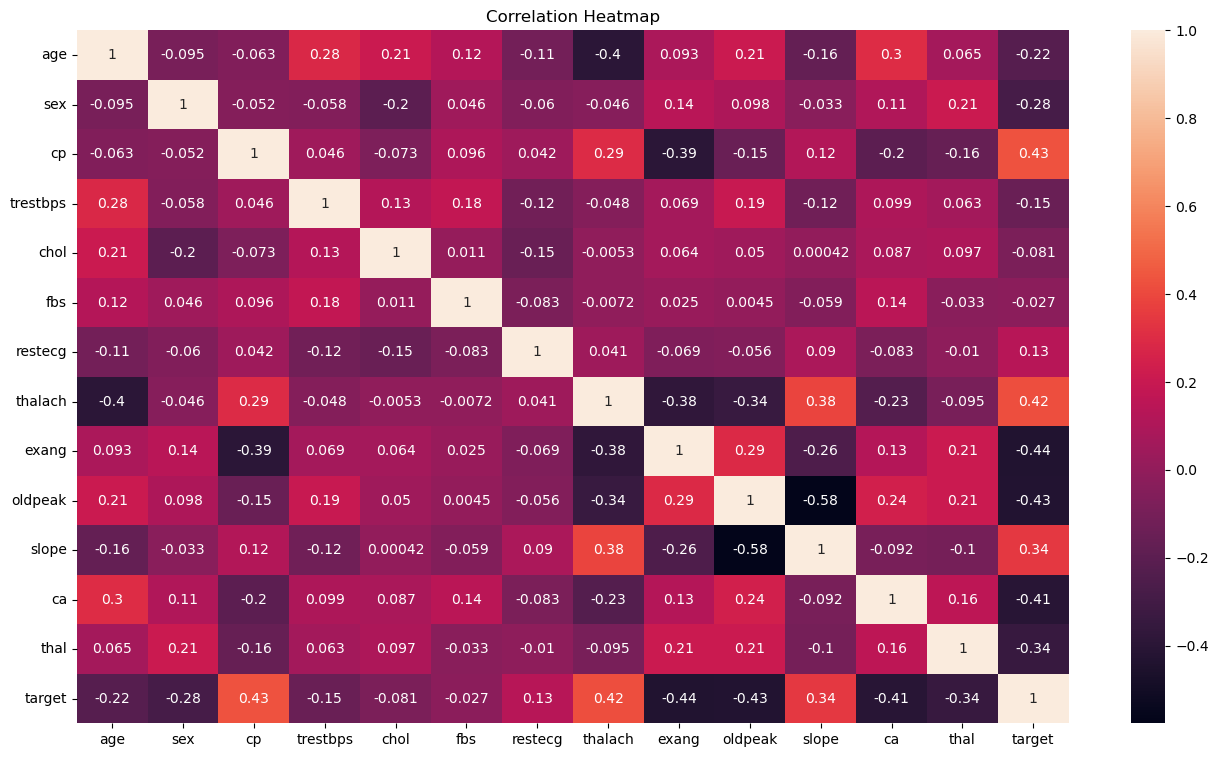

In [20]:
# Correlation heatmap

plt.figure (figsize = (16,9)) #FOR SIZE OF TABLE
sns.heatmap(df.corr(), annot = True )
plt.title ("Correlation Heatmap")

plt.show()

## 9. Top 5 features correlated with heart diseases 

In [21]:
# Compute correlation matrix

corr = df.corr()

#Correlation of all features with the target (heart disease)

target_corr = corr["target"].sort_values (ascending = False)

#Display top 5 positively correlated features (excludinh target itself)

top_5_features = target_corr [1:6]
print("Top 5 features most positively correlated with Heart Disease:")

print(top_5_features)

Top 5 features most positively correlated with Heart Disease:
cp         0.432080
thalach    0.419955
slope      0.343940
restecg    0.134874
fbs       -0.026826
Name: target, dtype: float64


## Visualizing top 5 features correlated with heart diseases

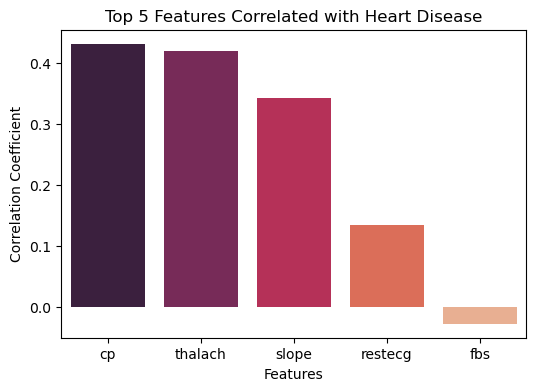

In [22]:
#Visualization

plt.figure (figsize = (6,4))
sns.barplot (x = top_5_features.index, y= top_5_features.values, palette=  "rocket")
plt.title ("Top 5 Features Correlated with Heart Disease")
plt.ylabel ("Correlation Coefficient")
plt.xlabel ("Features")

plt.show()

## 10. Key Insights On Numerical & Categorical Columns

**The Numerical columns Distribution** - : The hisplot shows the distribution of Numerical Features in the heart disease dataset

- The Distribution cols of the **Age column has a negative skewness of (-0.20)** and **Negative Kurtosis 0f (-0.527)**.
- The Distribution cols of the **Trestbps column has a positive skewness of (0.72)** and **Negative Kurtosis 0f (- 0.922)**.
- The Distribution cols of the **Chols column has a positive skewness of (1.15)** and **Positive Kurtosis 0f (4.542)**.
- The Distribution cols of the **Thalach column has a Negative skewness of (-0.53)** and **Negative Kurtosis 0f (- 0.062)**.

**The Categorical Columns Distribution** -:

- The **sex barchat** shows that **Sex = 1 (male)** has a higher count than **Sex = 0 (female)**.
- The **Chest pain(cp) barcha** shows variation among pain types (values 0-3), with the **Type 0 being dominant** amidst the other type of chest pain.
- The **Fasting Blood Sugar (fbs) barchat** shows that there are more **zeros (no fasting blood sugar), meaning fewer people have high fasting blood sugar (the ones = 1)**.
- The **restecg (Resting ECG results) barchat** shows that most people have **normal ECG (0)**, with fewer in other categories.
- The **exang (Exercise induced angina) plot** shows that **more people are exang = 0** *(NO ANGINA)*, **than exang = 1**  which is **(angina present)**

## Overall Interpretation:

- The dataset seems **imbalanced** across some categorical features — for example, there are **more males and fewer individuals with high fasting blood sugar or exercise-induced angina**.
- This imbalance can influence your model training — categorical imbalance can bias predictions toward the majority class.


## 11a. Key Insight On Bivariate Analysis:

**(AGE VS HEART DISEASES)**

1.	**Age Distribution (General Trend**:
- Most people in the dataset are between **40 and 65 years old**, which is where the majority of the data points fall.
  
2.	**Heart Disease and Age Relationship**:
- Heart disease (target = 1, orange color) **appears more common among people aged 45–60**.
- **Younger people (under 40) and older people (above 65) have fewer cases**, possibly due to sample size or lower occurrence.
  
3.  **Observation**:
- There’s a significant **overlap between both groups in the middle-age ranges (40–60)**, which suggests **that age alone may not perfectly predict heart disease** but still has some influence.
  
4.  **Possible Pattern**:
- The number of people without heart disease **(target = 0, purple) seems slightly higher at younger ages**.
- **As age increases, the proportion of people with heart disease rises** — showing a positive correlation between age and the likelihood of heart disease, (AGE IS DIRECTLY PROPORTIONAL TO RISE IN HEART DISEASES).


## Overall Interpretation:

The histogram suggests that:

- **Heart disease risk increases with age**, especially between 45 and 60.
- Age is an important predictor in heart disease analysis.



## 11b. Key Insight on Bivariate Analysis 

**(CHOLESTEROL VS HEART DISSEASES)**
- Cholesterol levels (chol) across two groups : **individuals with heart disease (target = 1)** and those **without heart disease (target = 0).**

1.	**Median Cholesterol Levels:**
- Both groups have **similar median cholesterol levels**, suggesting that total cholesterol alone may not differ greatly between those with and without heart disease.
  
2.	**Spread of Cholesterol Values:**
- The interquartile range (IQR) : the box height — is **roughly similar for both groups**, indicating comparable variability in cholesterol within each group.
  
3.	**Outliers:**
- There are several outliers (points above the whiskers) in both groups, **representing individuals with unusually high cholesterol levels (above 400 mg/dL)**.
  
4.	**Overall Distribution:**
- Both groups show cholesterol values ranging roughly **from 150 to 400 mg/dL**, though individuals **without heart disease (target = 0) appear to have slightly more extreme high-end outliers**.


## 11c. Key Insight on Bivariate Analysis 

**(RESTING BLOOD PRESSURE VS HEART DISSEASES)**
- compares resting blood pressure (trestbps) between two groups:
- target = 0 → people without heart disease
- target = 1 → people with heart disease

1.	**Median Comparison:**
- The median resting blood pressure is **slightly lower for people with heart disease (target = 1) compared to those without (target = 0)**.
- This suggests that, in this dataset, blood pressure alone may not be a strong differentiator between people with and without heart disease.
  
2.	**Interquartile Range (IQR):**
- Both groups have a similar IQR **(spread of middle 50% of values)**, meaning the variation in blood pressure is quite comparable.
  
3.	**Outliers:**
- Both groups show outliers, **especially on the higher end (above 180–200 mmHg)**, indicating that a **few individuals have unusually high resting blood pressure values**.
  
4.	**Overall Distribution:**
- The overall distribution of blood pressure **overlaps heavily between the two groups**, which further supports the idea that resting blood pressure alone may not be a strong predictor of heart disease in this dataset.

## Conclusion:
- Although high blood pressure is often a risk factor for heart disease, in this dataset, individuals with and without heart disease have comparable resting blood pressure levels. Therefore, it might be necessary to consider other factors (like cholesterol, age, or chest pain type) along with trestbps to make stronger predictions.

## 12. Key Insight On Correlation Analysis
- This is a correlation heatmap that shows how **strongly** (and in what direction) different numerical variables in your heart disease dataset relate to one another.
- Correlation values range from –1 to +1:
- +1 → perfect positive relationship (as one increases, the other increases)
- –1 → perfect negative relationship (as one increases, the other decreases)
-  0 → no linear relationship

1.	**Strongest correlation with target (heart disease presence):**
- The variable with the **highest positive correlation** with target appears to be around **(+0.43)**, which is **Cp** and **thalach** close to it (maximum heart rate achieved).
- This means **higher heart rates** are positively associated with **heart disease diagnosis in this dataset**.
- Another noticeable correlation is the negative correlation.
 **This negative correlation means that higher ST depression values are associated with lower likelihood of heart disease.**
  
2.	Other variables such as age, chol (cholesterol), and trestbps (resting blood pressure) **have very weak correlations with target (close to 0), meaning they do not have a strong direct linear relationship with heart disease in this dataset**.
  
3.	**Inter-variable relationships:**
- age and trestbps show a small positive correlation (~0.28) — **as age increases, resting blood pressure tends to increase slightly**.
- Most other variable pairs show low correlations, which is good — **it means there’s low multicollinearity (features are not highly redundant)**.

## Conclusion :
- The correlation analysis shows that **maximum heart rate (cp) has the strongest positive relationship with heart disease**, while **(exang) has the strongest negative relationship**.
- Other features such as **age, cholesterol, and resting blood pressure** have **weaker** relationships with the target variable, suggesting that they alone are not strong predictors of heart disease but may still contribute when combined with other features in a model.


## 13. Top 5 features Correlated with Heart Diseases

- **Top 5 features most positively correlated with Heart Disease:**
- cp         0.432080
- thalach    0.419955
- slope      0.343940
- restecg    0.134874
- fbs       -0.026826